### **1. Car Price Prediction Challenge**

##### **Проблемная область**

Проблемная область этого набора данных связана с анализом рынка автомобилей. Данные могут быть использованы для анализа ценовых тенденций, определения характеристик автомобилей, влияющих на их стоимость, а также для изучения предпочтений потребителей в отношении моделей, производителей и других характеристик. Объектами наблюдения являются автомобили, представленные в наборе данных.


In [82]:
import pandas as pd
df = pd.read_csv(".//static//csv//car_price_prediction.csv")
print(df.info, "\n")

<bound method DataFrame.info of              ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather inter

#### **Объекты наблюдения**

Объектами наблюдения являются автомобили, представленные в наборе данных.

#### **Атрибуты объектов**

In [87]:
attributes = df.columns
for attribute in attributes:
    print(attribute)

ID
Price
Levy
Manufacturer
Model
Prod. year
Category
Leather interior
Fuel type
Engine volume
Mileage
Cylinders
Gear box type
Drive wheels
Doors
Wheel
Color
Airbags
price_log
price_category


#### **Связи между объектами**

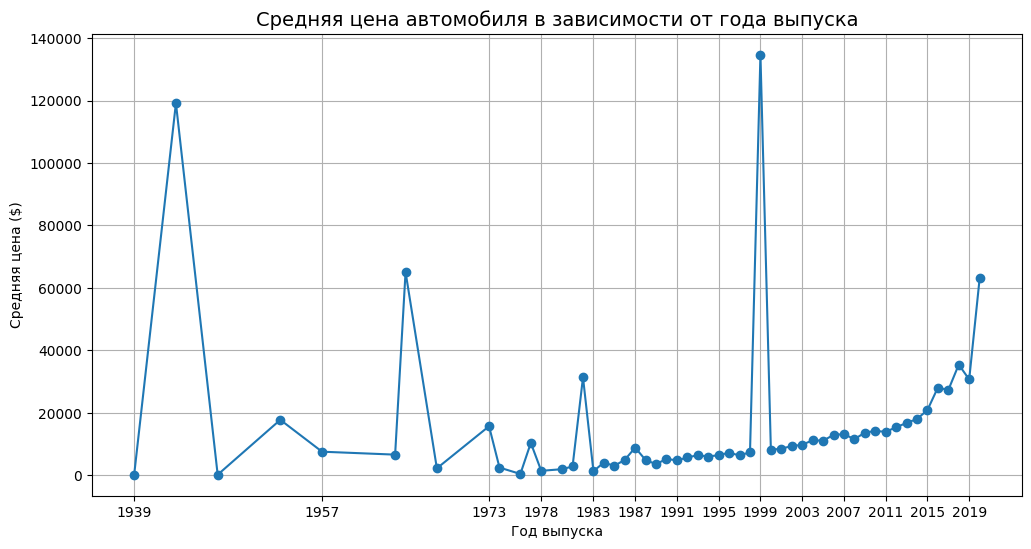

In [16]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Prod. year'] = pd.to_numeric(df['Prod. year'], errors='coerce')

df.dropna(subset=['Price', 'Prod. year'], inplace=True)

avg_price_per_year = df.groupby('Prod. year')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_year['Prod. year'], avg_price_per_year['Price'], marker='o')
plt.title('Средняя цена автомобиля в зависимости от года выпуска', fontsize=14)
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена ($)')
plt.grid(True)

plt.xticks(avg_price_per_year['Prod. year'][::4])

plt.show()

**Вывод:** наличие корреляции между такими атрибутами, как цена, год производства, пробег, тип топливаnи и объем двигателя. Например, более новые автомобили с меньшим пробегом могут иметь более высокую цену.
Категория автомобиля и его производитель также могут иметь связь с ценой и популярностью модели среди потребителей. Например, на графике показана зависимоость цены от года выпуска. По графику можно заметить: чем новее автомобиль, тем дороже его цена, за ислючением некоторых автомобилей.

 


#### **Бизнес-цели:**


**Ценообразование**
Построение моделей для прогнозирования цен на автомобили на основе их характеристик. Эффект для бизнеса: Оптимизация стратегии продаж и увеличение прибыли.

**Анализ спроса**
Определение популярных моделей и типов автомобилей. Эффект для бизнеса: Более точное управление запасами и увеличение удовлетворенности клиентов.


#### **Цели технического проекта**

**Для ценообразования:**

Цель: Разработка модели для прогнозирования цен.
Входные данные: Данные о характеристиках автомобилей (год выпуска, тип топлива, пробег и др.).
Целевой признак: Цена автомобиля.

**Для анализа спроса:**

Цель: Анализ спроса на различные модели автомобилей.
Входные данные: Данные о продажах, характеристиках и моделях автомобилей.
Целевой признак: Частота продаж конкретных моделей и типов.

#### **Проблемы данных**


In [45]:
import numpy as np

# Заменяем "-" на NaN только в числовых столбцах
numeric_columns = ['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
df[numeric_columns] = df[numeric_columns].replace("-", np.nan)

# Проверяем пропущенные значения снова
missing_values = df.isnull().sum()
print("Пропущенные значения в данных:\n", missing_values)

# Фильтрация только числовых столбцов для анализа выбросов
numerical_data = df.select_dtypes(include=[np.number])

# 2. Анализ выбросов
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).sum()
print("\nВыбросы в числовых столбцах:\n", outliers)

# 3. Анализ смещения данных
category_counts = df['Manufacturer'].value_counts()
print("\nРаспределение автомобилей по производителям:\n", category_counts)

# 4. Анализ актуальности данных
max_production_year = df['Prod. year'].max()
min_year_from_car = df['Prod. year'].min()

print("\nПоследний год производства в данных:", max_production_year)
print("\nначальный год:", min_year_from_car)

Пропущенные значения в данных:
 ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

Выбросы в числовых столбцах:
 ID            2531
Price          627
Prod. year     829
Cylinders        0
Airbags          0
dtype: int64

Распределение автомобилей по производителям:
 Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

Последний год производств

В наборе данных есть пропущенные значения в столбце Levy. Выбросы встречаются с столбцах Price, Prod. year, Cylinders. Набор данных сильно смещён в сторону нескольких производителей, таких как Hyundai, Toyota, и Mercedes-Benz, которые составляют большую часть данных.
В то же время, такие бренды, как Lamborghini, Pontiac, Saturn, и Aston Martin, представлены всего одной записью. Последний год выпуска в наборе данных — 2020: Данные устарели на несколько лет. Это может означать, что новые модели автомобилей, выпущенные после 2020 года, не учтены, что снижает актуальность данных для анализа современного рынка автомобилей.

####  **Примеры решения обнаруженных проблем**

В столбце Levy имеется 5819 пропущенных значений. Заполним пропуски, подставив 0.

In [53]:
df['Levy'] = df['Levy'].fillna(0) 

Заменим выбрасы на медиану

In [111]:
for col in ['Price', 'Prod. year', 'Cylinders']:
    Q1 = df[col].quantile(0.25)  # 1-й квартиль
    Q3 = df[col].quantile(0.75)  # 3-й квартиль
    IQR = Q3 - Q1  # Интерквартильный размах
    median = df[col].median()  # Медиана

    # Определение выбросов
    condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

    # Замена выбросов на медиану
    df[col] = np.where(condition, median, df[col])

Если нужно использовать для анализа машины определенных лет выпуска, можем отфильтровать данные следующим образом:

In [ ]:
df = df[df['Prod. year'] >= 2015]

#### **Оценка качества данных**

Для каждой категориальной переменной, такой как Manufacturer, Model, Category, можно подсчитать количество уникальных значений. Это даст представление о разнообразии и информативности данных.


In [109]:
unique_counts = df.nunique()
print(unique_counts)

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
price_log            2315
price_category          5
dtype: int64


Мы видим здесь 65 брендов машин и 1590 различных моделей, что говорит а разнообразии данных.

Проверим на соответствие реальным данным

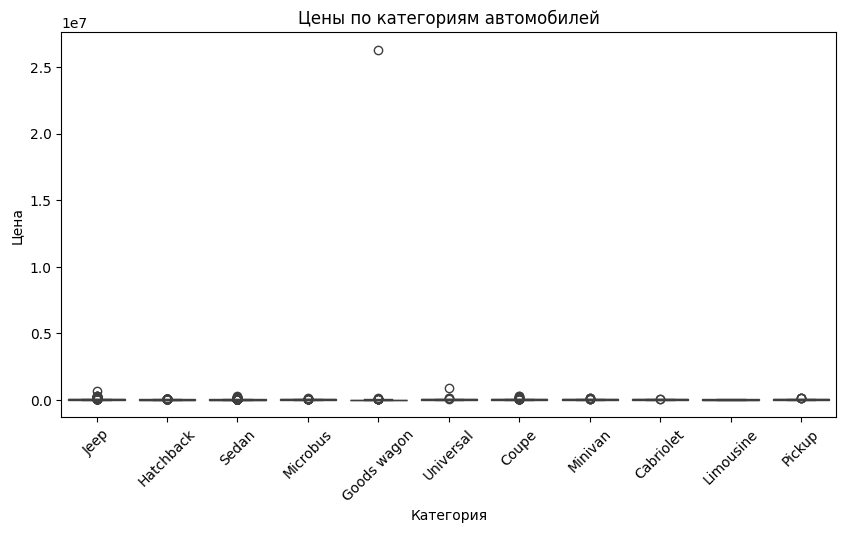

In [110]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Цены по категориям автомобилей')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

данная диаграмма была получина до устранения выбрасов.

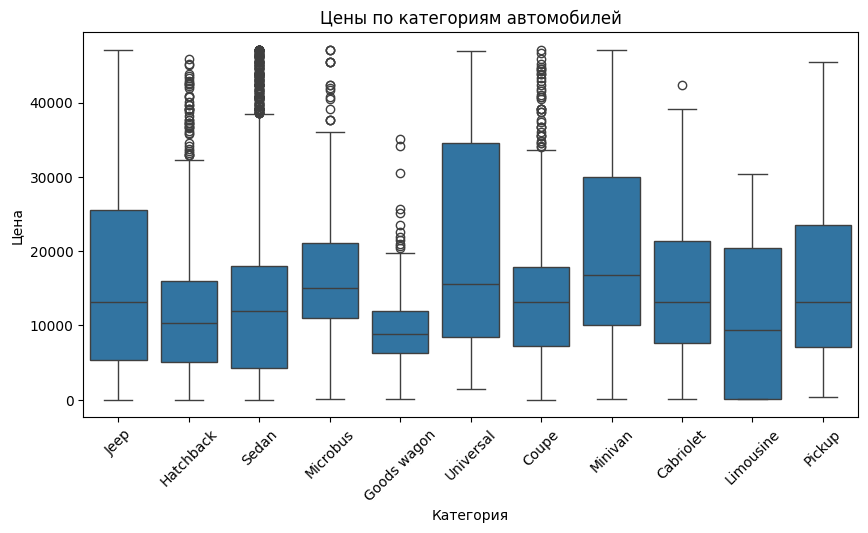

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Цены по категориям автомобилей')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

После устранения выбрасов, диаграмма выглядит лучше, хотя здесь все равно присутствуют очень маленькие значения, что не соответсвуем реальным ценам на машины. Из этого можем сделать вывод, что цены в наборе данных не особо соответствуют реальности. 

Данный датасет содержит все ключевые аспекты, которые могут повлиять на цены автомобилей, поэтому его можно считать информативными.

#### **Разбиение данных на выборки и Приращение данных**

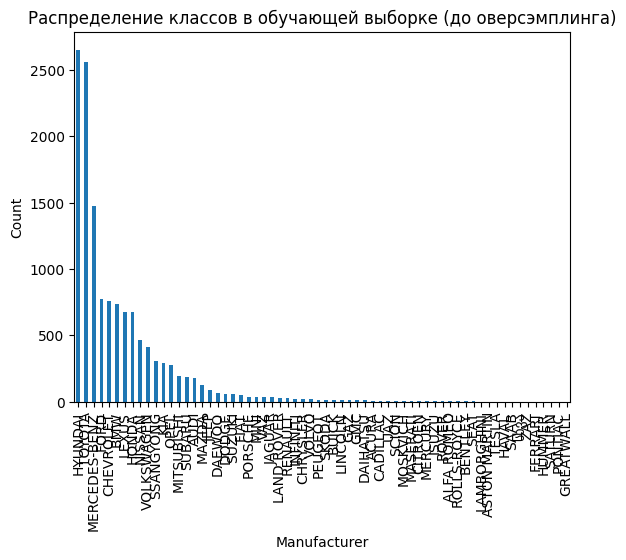

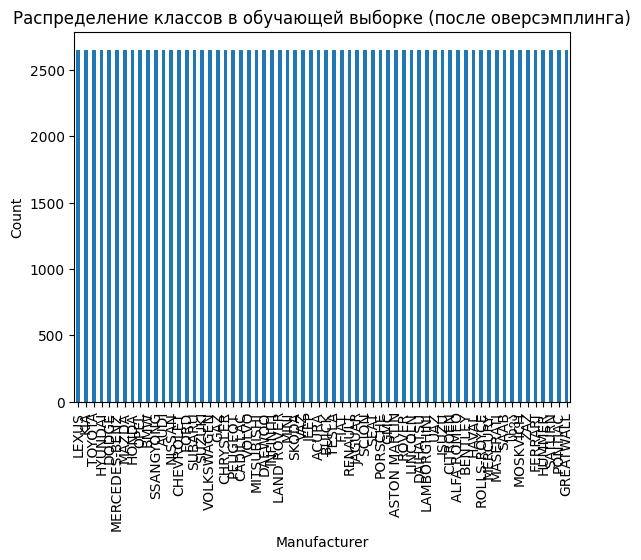

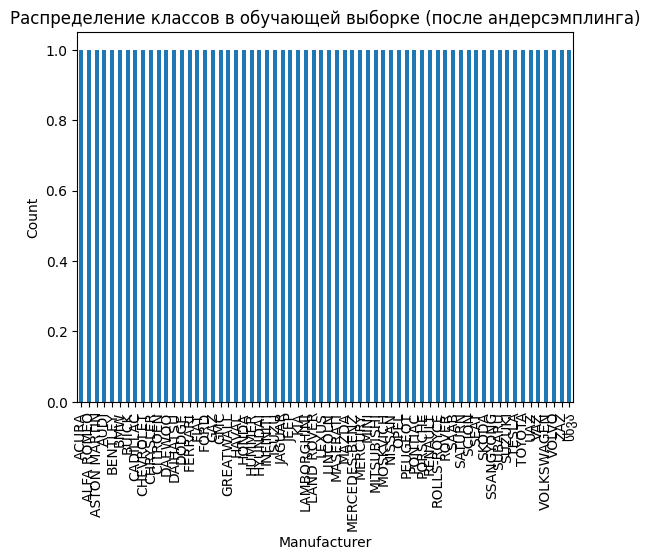

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Загрузка данных
new1 = pd.read_csv(".//static//csv//car_price_prediction.csv")

# Разбиение на обучающую и временную выборки
train_data, temp_data = train_test_split(new1, test_size=0.3, random_state=42)

# Разбиение временной выборки на контрольную и тестовую
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Определяем целевую переменную и признаки
X = train_data.drop(columns=['Manufacturer'])  # Признаки
y = train_data['Manufacturer']  # Целевая переменная

# Функция для визуализации распределения
def plot_class_distribution(data, title):
    data['Manufacturer'].value_counts().plot(kind='bar', title=title)
    plt.xlabel('Manufacturer')
    plt.ylabel('Count')
    plt.show()

# Визуализация распределения классов до оверсэмплинга
plot_class_distribution(train_data, 'Распределение классов в обучающей выборке (до оверсэмплинга)')

# Применение оверсэмплинга
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Создание нового DataFrame для оверсэмплинга
train_resampled_over = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled_over['Manufacturer'] = y_resampled

# Визуализация распределения классов после оверсэмплинга
plot_class_distribution(train_resampled_over, 'Распределение классов в обучающей выборке (после оверсэмплинга)')

# Применение андерсэмплинга
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Создание нового DataFrame для андерсэмплинга
train_resampled_under = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled_under['Manufacturer'] = y_resampled

# Визуализация распределения классов после андерсэмплинга
plot_class_distribution(train_resampled_under, 'Распределение классов в обучающей выборке (после андерсэмплинга)')

По графикам можно увидить, что изначалльно выборки были сбалансированы плохо, но после приращения ситуация кординально изменилась.

#### **2. Forbes 2022 Billionaires data**


#### **Проблемная область**

Проблемная область данного набора данных связана с анализом состояния, возраста и источников богатства самых богатых людей в мире. Это может быть полезно для понимания, какие факторы влияют на накопление богатства и как эти факторы могут варьироваться в зависимости от региона и индустрии.

In [63]:
import pandas as pd
df2 = pd.read_csv(".//static//csv//Forbes Billionaires.csv")
print(df2.info, "\n")

<bound method DataFrame.info of       Rank                        Name  Networth  Age        Country  \
0         1                 Elon Musk      219.0   50  United States   
1         2                Jeff Bezos      171.0   58  United States   
2         3  Bernard Arnault & family      158.0   73         France   
3         4                Bill Gates      129.0   66  United States   
4         5            Warren Buffett      118.0   91  United States   
...     ...                        ...       ...  ...            ...   
2595   2578    Jorge Gallardo Ballart        1.0   80          Spain   
2596   2578              Nari Genomal        1.0   82    Philippines   
2597   2578            Ramesh Genomal        1.0   71    Philippines   
2598   2578            Sunder Genomal        1.0   68    Philippines   
2599   2578     Horst-Otto Gerberding        1.0   69        Germany   

                      Source                Industry  
0              Tesla, SpaceX             Automot

#### **Объекты наблюдения**

Объектами наблюдения являются богатейшие люди мира, представленные в наборе данных.

#### **Атрибуты объектов**

In [89]:
attributes = df.columns
for attribute in attributes:
    print(attribute)

ID
Price
Levy
Manufacturer
Model
Prod. year
Category
Leather interior
Fuel type
Engine volume
Mileage
Cylinders
Gear box type
Drive wheels
Doors
Wheel
Color
Airbags
price_log
price_category


#### **Связи между объектами**

Можно выявить связи между возрастом и состоянием, страной проживания и источником дохода, а также отраслью и уровнем благосостояния.

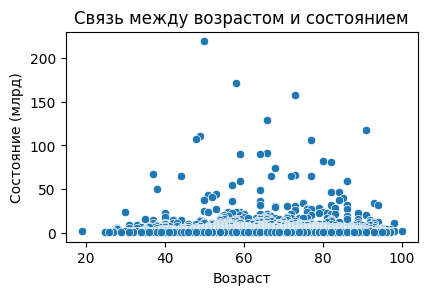

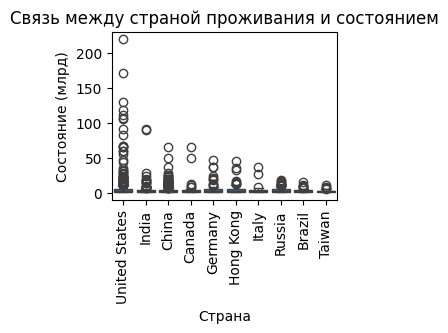

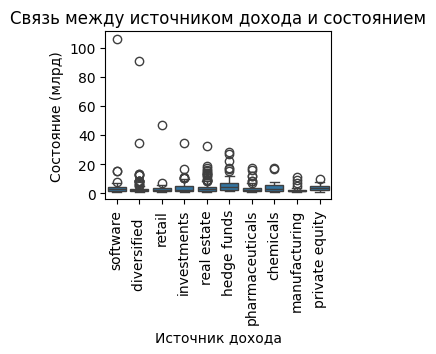

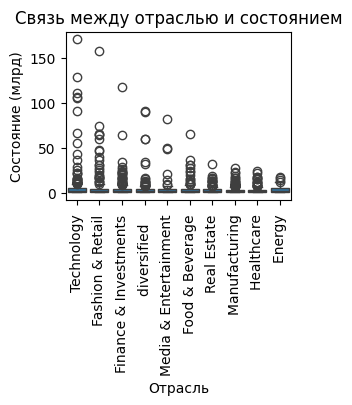

In [128]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Связь между возрастом и состоянием
plt.subplot(2, 2, 1)
sns.scatterplot(data=df2, x='Age', y='Networth')
plt.title('Связь между возрастом и состоянием')
plt.xlabel('Возраст')
plt.ylabel('Состояние (млрд)')
plt.show()


# Связь между страной проживания и состоянием (топ-10 стран)
plt.subplot(2, 2, 2)
top_countries = df2['Country'].value_counts().index[:10]
sns.boxplot(data=df2[df2['Country'].isin(top_countries)], x='Country', y='Networth')
plt.title('Связь между страной проживания и состоянием')
plt.xticks(rotation=90)
plt.xlabel('Страна')
plt.ylabel('Состояние (млрд)')
plt.show()


# Связь между источником дохода и состоянием (топ-10 источников дохода)
plt.subplot(2, 2, 3)
top_sources = df2['Source'].value_counts().index[:10]
sns.boxplot(data=df2[df2['Source'].isin(top_sources)], x='Source', y='Networth')
plt.title('Связь между источником дохода и состоянием')
plt.xticks(rotation=90)
plt.xlabel('Источник дохода')
plt.ylabel('Состояние (млрд)')
plt.show()

# Связь между отраслью и состоянием (топ-10 отраслей)
plt.subplot(2, 2, 4)
top_industries = df2['Industry'].value_counts().index[:10]
sns.boxplot(data=df2[df2['Industry'].isin(top_industries)], x='Industry', y='Networth')
plt.title('Связь между отраслью и состоянием')
plt.xticks(rotation=90)
plt.xlabel('Отрасль')
plt.ylabel('Состояние (млрд)')
plt.show()




#### **Бизнес-цели:**

Понять факторы успеха:

Бизнес-цель: Исследовать, какие факторы (возраст, страна, источник дохода) коррелируют с высоким состоянием.
Эффект для бизнеса: Это может помочь новым предпринимателям и стартапам учиться на опыте успешных людей.

Анализ тенденций богатства:

Бизнес-цель: Изучить, как источники богатства меняются со временем и как это связано с экономическими условиями в разных странах.
Эффект для бизнеса: Поможет инвесторам и аналитикам определить, какие секторы могут быть наиболее перспективными для инвестиций в будущем.

#### **Цели технического проекта**

Цель 1: Анализ тенденций богатства.

Входные данные: Данные о богатейших людях (возраст, страна, источник богатства).
Целевой признак: Наличие зависимости между источником богатства и страной.

Цель 2: Исследование факторов успеха.

Входные данные: Данные о богатейших людях (возраст, чистая стоимость, индустрия).
Целевой признак: Выявление факторов, способствующих накоплению состояния.

#### **Проблемы данных**


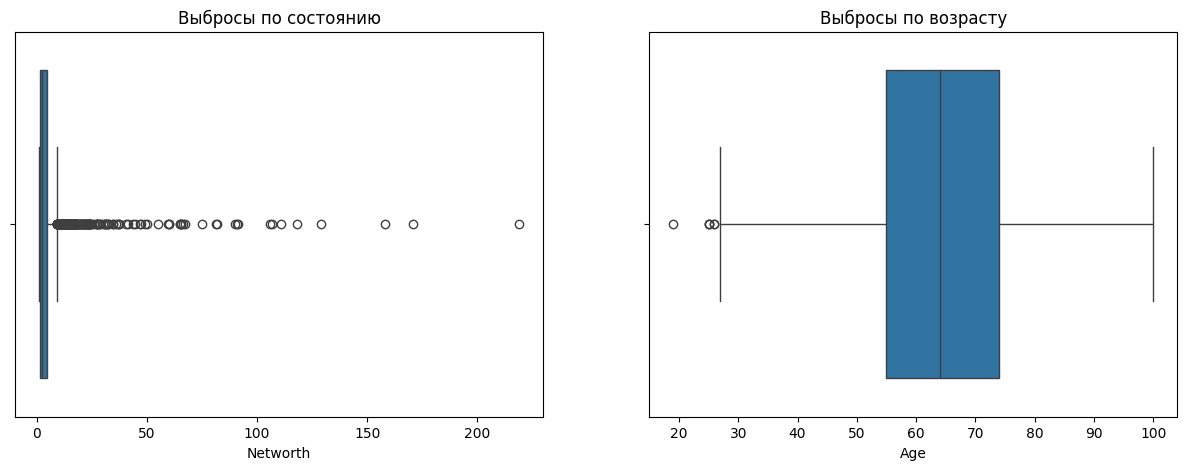

Размер данных до удаления выбросов:  (2600, 7)


In [129]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df2, x='Networth', ax=axs[0])
axs[0].set_title("Выбросы по состоянию")

sns.boxplot(data=df2, x='Age', ax=axs[1])
axs[1].set_title("Выбросы по возрасту")

plt.show()
print("Размер данных до удаления выбросов: ", df2.shape)


В данном случае выбросов нет, все данные находятся в пределах допустимых значений

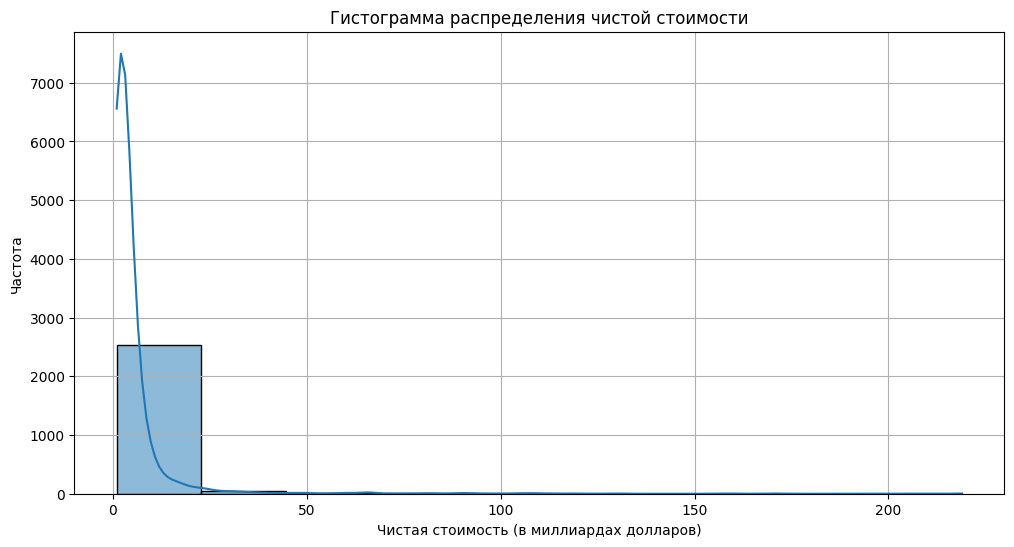

In [69]:
# Гистограмма распределения чистой стоимости
plt.figure(figsize=(12, 6))
sns.histplot(df2['Networth'], bins=10, kde=True)
plt.title('Гистограмма распределения чистой стоимости')
plt.xlabel('Чистая стоимость (в миллиардах долларов)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Распределение чистой стоимости показало сильно смещённый характер. Основная масса значений сосредоточена в нижней части диапазона, с небольшим количеством высоких значений. Это указывает на наличие значительного количества людей с относительно низкой чистой стоимостью, в то время как несколько индивидуумов (например, миллиардеры) имеют очень высокую чистую стоимость. 

#### **Оценка качества данных**

Для оценки покрытия мы смотрим на то, насколько разнообразны данные по странам, отраслям и возрастам.

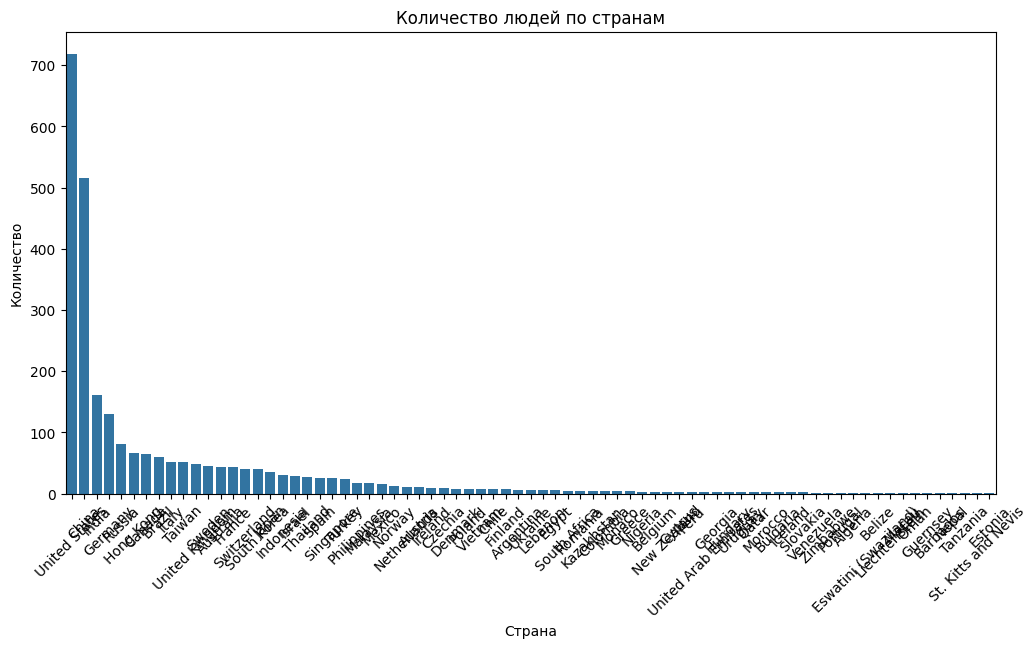

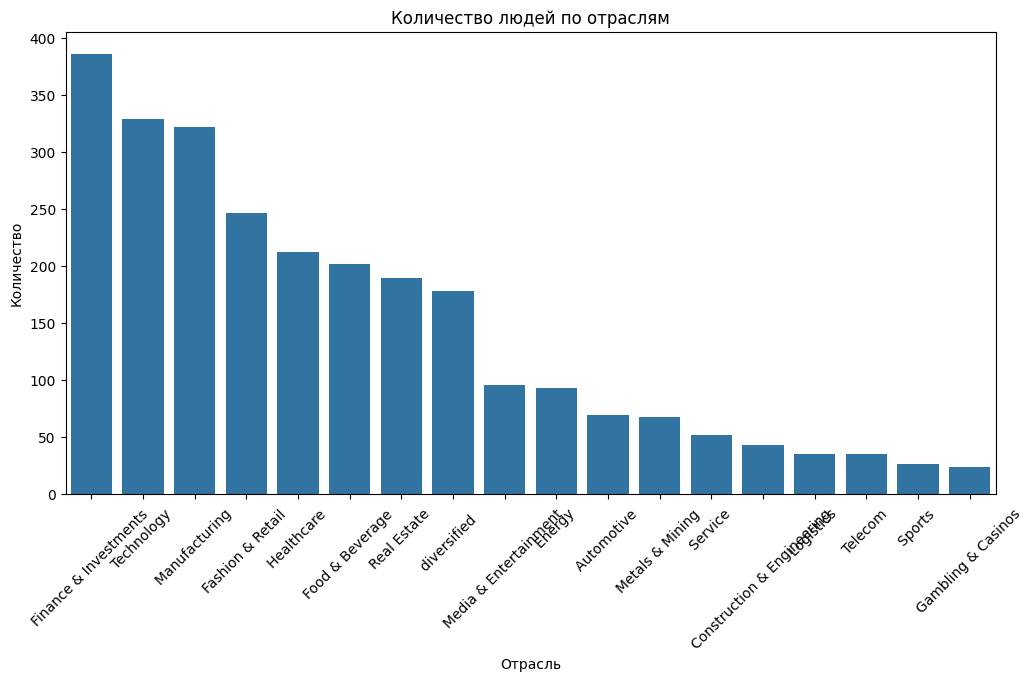

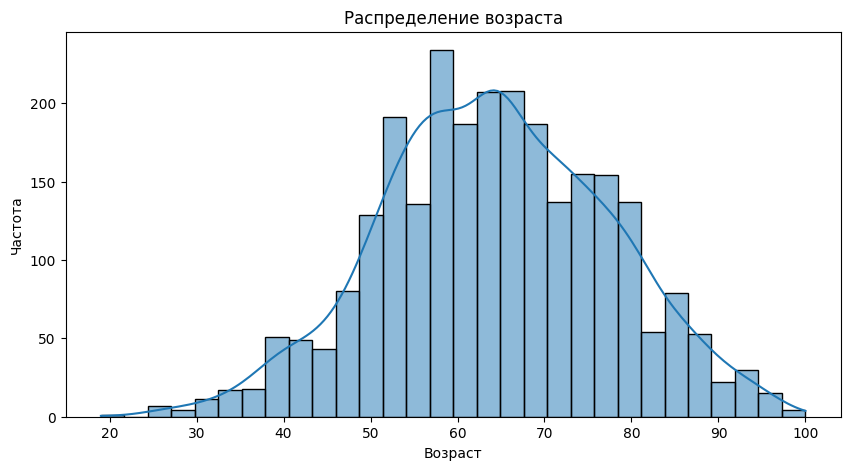

In [73]:
# 1. Столбчатая диаграмма по странам
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Country', order=df2['Country'].value_counts().index)
plt.title('Количество людей по странам')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# 2. Столбчатая диаграмма по отраслям
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Industry', order=df2['Industry'].value_counts().index)
plt.title('Количество людей по отраслям')
plt.xlabel('Отрасль')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# 3. Гистограмма для анализа возраста
plt.figure(figsize=(10, 5))
sns.histplot(df2['Age'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Графики показывают широкий спектр стран и отраслей, представленных в наборе данных. Это свидетельствует о том, что данные охватывают множество регионов и различных сфер деятельности.



#### **Устранение проблемы пропущенных данных**

In [76]:
missing_values = df2.isnull().sum()
print("Пропущенные значения в данных:\n", missing_values)

Пропущенные значения в данных:
 Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64


Пропущенных данных не найдено.

#### **Разбиение набора данных на обучающую, контрольную и тестовую выборки**

In [78]:
from sklearn.model_selection import train_test_split

# Разделим набор данных на признаки (X) и целевой признак (y)
X = df2.drop(columns=['Networth'])
y = df2['Networth']

# Разделение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размера выборок
(X_train.shape, X_val.shape, X_test.shape)

((1560, 6), (520, 6), (520, 6))

#### **Оценка сбалансированности выборок**

In [79]:
# Проверка распределения целевого признака по выборкам
train_dist = y_train.describe()
val_dist = y_val.describe()
test_dist = y_test.describe()

train_dist, val_dist, test_dist

(count    1560.000000
 mean        5.208173
 std        12.653032
 min         1.000000
 25%         1.500000
 50%         2.400000
 75%         4.300000
 max       219.000000
 Name: Networth, dtype: float64,
 count    520.000000
 mean       4.443654
 std        7.267615
 min        1.000000
 25%        1.500000
 50%        2.400000
 75%        4.825000
 max       91.400000
 Name: Networth, dtype: float64,
 count    520.000000
 mean       4.235577
 std        5.861496
 min        1.000000
 25%        1.600000
 50%        2.500000
 75%        4.500000
 max       60.000000
 Name: Networth, dtype: float64)

In [85]:

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=12)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=12)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Размеры после oversampling:", X_train_over.shape, y_train_over.shape)
print("Размеры после undersampling:", X_train_under.shape, y_train_under.shape)

Размеры после oversampling: (13910, 10047) (13910,)
Размеры после undersampling: (13065, 10047) (13065,)


#### **3. Pima Indians Diabetes Database**

##### **Проблемная область**

Проблемная область: Набор данных касается предсказания наличия диабета у пациентов на основе различных медицинских измерений, таких как уровень глюкозы, артериальное давление, толщина кожи, уровень инсулина и другие параметры.

In [86]:
import pandas as pd
df3 = pd.read_csv(".//static//csv//diabetes.csv")
print(df3.info, "\n")

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

#### **Объекты наблюдения**

Объектами наблюдения являются пациенты

#### **Атрибуты объектов**

In [88]:
attributes = df3.columns
for attribute in attributes:
    print(attribute)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


#### **Связи между объектами**

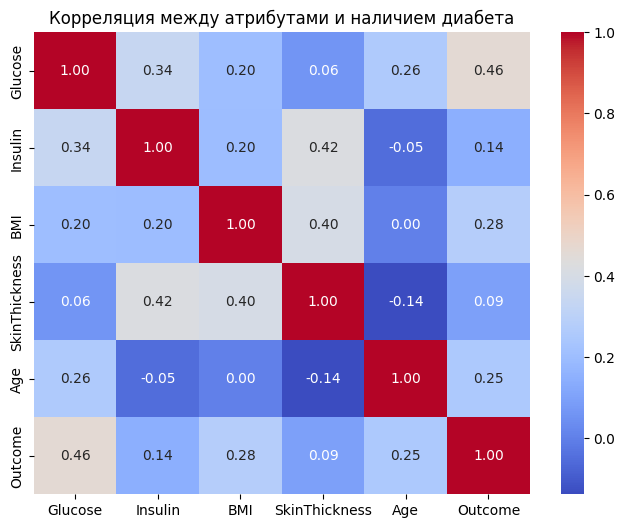

In [108]:
# Создаем матрицу корреляций
correlation_matrix = df3[['Glucose', 'Insulin', 'BMI', 'SkinThickness','Age', 'Outcome']].corr()

# Строим тепловую карту для визуализации корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между атрибутами и наличием диабета')
plt.show()

Тепловая карта показывает, что существует значительная положительная корреляция между уровнем глюкозы и наличием диабета, что свидетельствует о важности уровня глюкозы в определении риска заболевания. Также наблюдается положительная связь между индексом массы тела (BMI) и наличием диабета, что подтверждает влияние лишнего веса на вероятность развития диабета. Корреляция между инсулином и наличием диабета также присутствует, но менее выражена, что указывает на необходимость более глубокого анализа этих данных для определения их значимости.


#### **Бизнес-цели:**

Улучшение ранней диагностики диабета:

Эффект для бизнеса: Помогает медицинским учреждениям выявлять пациентов с риском диабета, что позволяет быстрее начинать лечение и снижать затраты на позднюю диагностику.
Разработка персонализированных планов лечения:

Эффект для бизнеса: Медицинские компании могут предлагать персонализированные планы лечения и диеты для пациентов на основе их предрасположенности к диабету.

#### **Цели технического проекта**

Ранняя диагностика диабета

Входные данные: Параметры здоровья пациента, такие как уровень глюкозы, артериальное давление, BMI и другие.
Целевой признак: Outcome (наличие диабета).
Персонализированные рекомендации

Входные данные: Исторические данные пациента, его возраст, индекс массы тела, уровень инсулина и т.д.
Целевой признак: Разработанные рекомендации или предсказание необходимости изменений в лечении.

#### **Проблемы данных**


In [92]:
# Проверяем пропущенные значения снова
missing_values = df3.isnull().sum()
print("Пропущенные значения в данных:\n", missing_values)

Пропущенные значения в данных:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


пропущенные данные отсутсвуют

Количество выбросов в столбце 'Pregnancies': 4
Количество выбросов в столбце 'Glucose': 5
Количество выбросов в столбце 'BloodPressure': 45


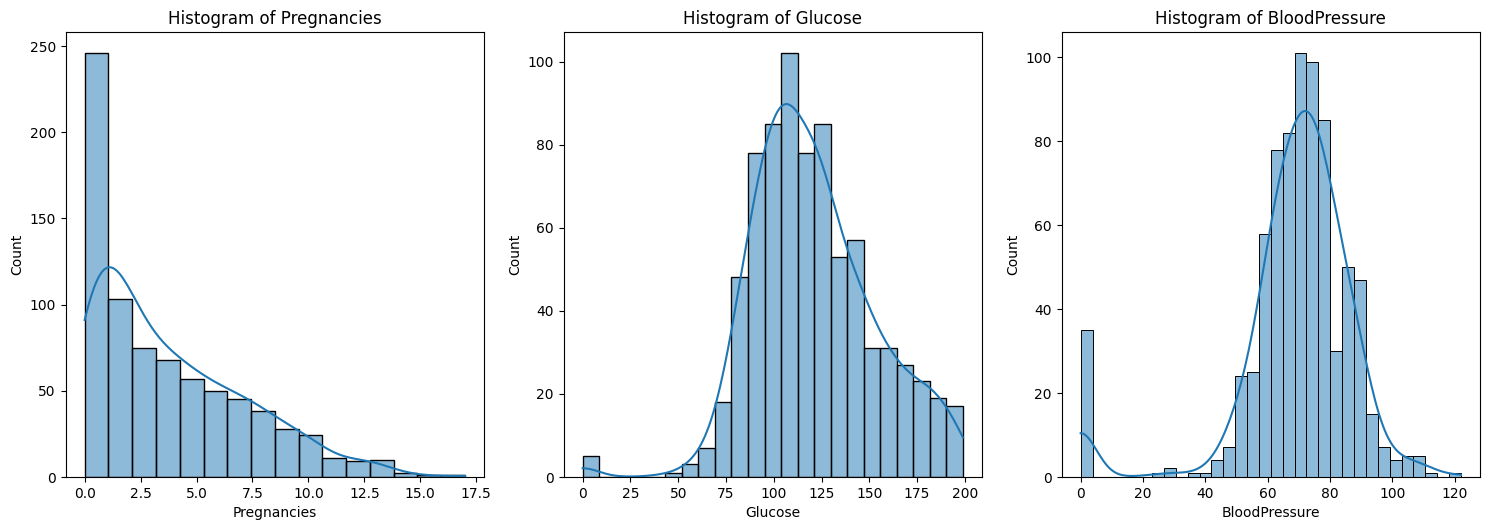

In [95]:

# Выбираем числовые столбцы
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure']

# Выбираем столбцы для анализа
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure']

# Функция для подсчета выбросов
def count_outliers(df3, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df3, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df3[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Устраним выбрасы в столбце BloodPressure

Количество удаленных строк: 45
Количество выбросов в столбце 'BloodPressure': 4


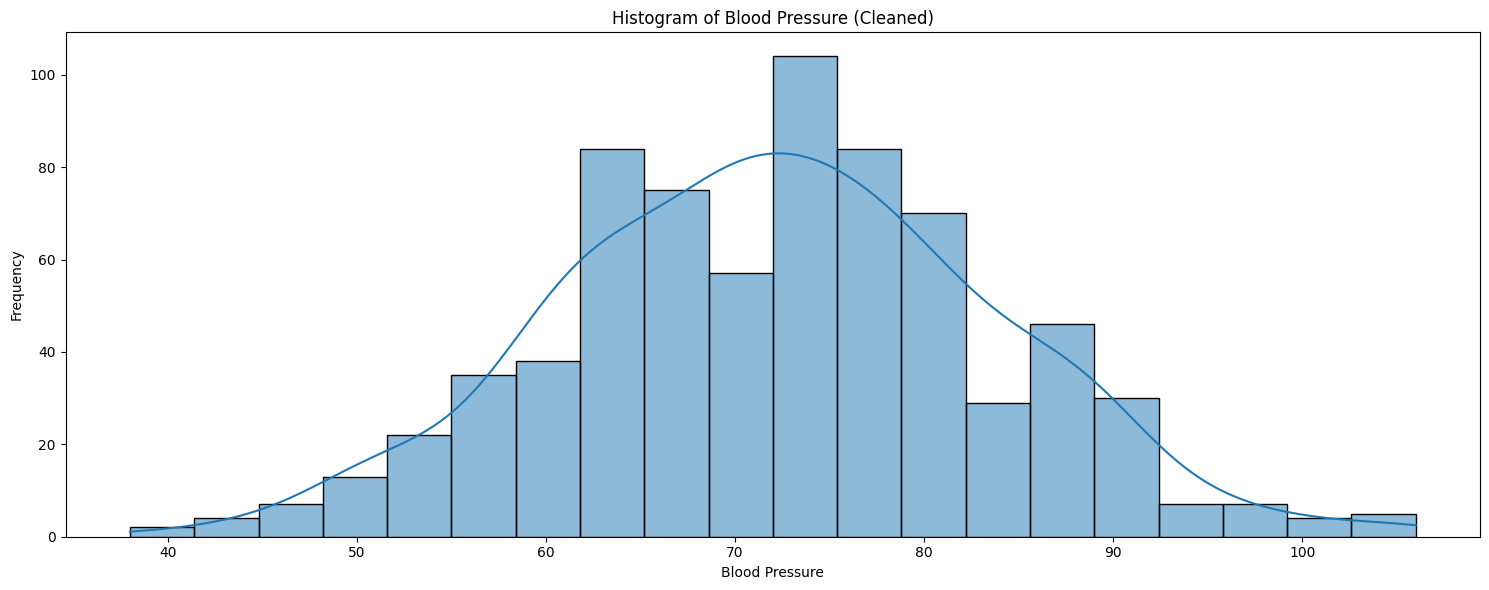

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для очистки
columns_to_clean = ['BloodPressure']

# Функция для удаления выбросов
def remove_outliers(df3, columns):
    for col in columns:
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df3 = df3[(df3[col] >= lower_bound) & (df3[col] <= upper_bound)]
    
    return df3

# Удаляем выбросы
df3_cleaned = remove_outliers(df3, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df3) - len(df3_cleaned)}")

df3 = df3_cleaned

# Выбираем столбцы для анализа
columns_to_check = ['BloodPressure']

# Функция для подсчета выбросов
def count_outliers(df3, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df3, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для BloodPressure
sns.histplot(df3_cleaned['BloodPressure'], kde=True)
plt.title('Histogram of Blood Pressure (Cleaned)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

видно, что количество выбросов сократилось.

#### **Оценка качества данных**

Все атрибуты (например, уровень глюкозы, индекс массы тела, уровень инсулина) являются важными показателями, которые могут существенно влиять на наличие диабета. Набор данных содержит достаточное количество релевантных признаков для анализа. Чтобы определить соответствие реальным данным, необходимо провести анализ статистики для проверки, соответствуют ли значения разумным медицинским стандартам.

#### **Разбиение данных на выборки**

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df3.drop('Outcome', axis=1)  # Признаки
y = df3['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер контрольной выборки:", X_val.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 433
Размер контрольной выборки: 145
Размер тестовой выборки: 145


In [105]:
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df3.drop('Outcome', axis=1)  # Признаки
y = df3['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности
check_balance(y_train, y_val, y_test)

Сбалансированность обучающей выборки:
Outcome
0    0.658199
1    0.341801
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.655172
1    0.344828
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.662069
1    0.337931
Name: proportion, dtype: float64


В обучающей выборке наблюдается незначительный дисбаланс между классами, где количество случаев отсутствия диабета превышает количество случаев наличия диабета. Это может привести к смещению модели в сторону предсказания класса 0.

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Разделение на признаки (X) и целевую переменную (y)
X = df3.drop('Outcome', axis=1)  # Признаки
y = df3['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Применение SMOTE для балансировки обучающей выборки
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности после SMOTE
print("Сбалансированность обучающей выборки после SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Проверка сбалансированности контрольной и тестовой выборок
check_balance(y_train_resampled, y_val, y_test)

Сбалансированность обучающей выборки после SMOTE:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64
Сбалансированность обучающей выборки:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.655172
1    0.344828
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.662069
1    0.337931
Name: proportion, dtype: float64


Выборка сбалансирована